# Parcial 1. Metodos Computacionales
## Santiago Andres Orjuela Montealegre
###1006508118

In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import lagrange

In [68]:
df = pd.DataFrame()
df['Día'] = [1,2,3,4,5,6]
df['IPMH'] = [464,494,532,552,576,589]

In [69]:
#sacando el 2% de cada valor
porcentaje = []
for i in df['IPMH']:
  ipor =  i*0.002
  porcentaje.append(ipor)

#se escoge un nomero aleaotrio entre el 2% del numero
incertidumbres = []
for j in porcentaje:
  n = np.random.uniform(-j,j)
  incertidumbres.append(n)

df['IPMH con Incertidumbre'] = df['IPMH']+incertidumbres 


In [70]:
coeffs = np.polyfit(df['Día'],df['IPMH con Incertidumbre'],deg=2)
p = np.poly1d(coeffs)

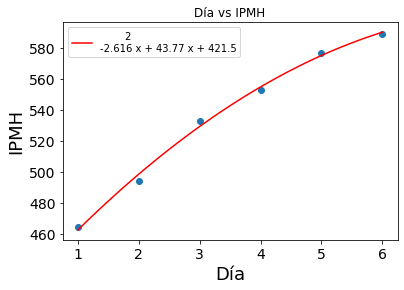

In [118]:
D = np.linspace(1,6,100)
plt.plot(df['Día'],df['IPMH con Incertidumbre'],'o')
plt.plot(D,p(D),'r-', label = f'{p}')
plt.title('Día vs IPMH')
plt.xlabel('Día',fontsize=18)
plt.ylabel(('IPMH'),fontsize=18)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.legend()
plt.show()

In [149]:
tiempo_incial = optimize.newton(p,1)

In [150]:
#velocidad 
v = p.deriv()

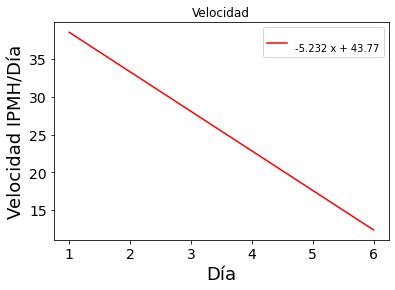

La velocidad incial = 79.54187849682322 IPMH/Día


In [151]:
plt.plot(D,v(D),'r-', label = f'{v}')
plt.title('Velocidad')
plt.xlabel('Día',fontsize=18)
plt.ylabel(('Velocidad IPMH/Día'),fontsize=18)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.legend()
plt.show()
print(f'La velocidad incial = {v(tiempo_incial)} IPMH/Día')

In [152]:
#Aceleracion
a = v.deriv()
print(f' Aceleración = {a} IPMH/Día**2')

 Aceleración =  
-5.232 IPMH/Día**2


In [153]:
x = optimize.newton(v,6) # dia en el que alcanza el maximo 
max = p(x) # El maximo de IPMH que se alcanza

print(f'El maximo de IPMH que se alcanza = {max}')
print(f'El dia que se alcanza el maximo de IPMH = {int(x)}')

El maximo de IPMH que se alcanza = 604.6139107292558
El dia que se alcanza el maximo de IPMH = 8


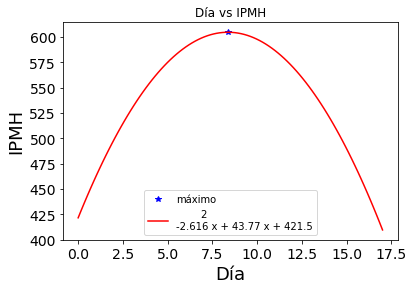

In [158]:
d = np.linspace(0,17,100)
plt.plot(x,max,'b*', label= 'máximo')
plt.plot(d,p(d),'r-', label = f'{p}')
plt.title('Día vs IPMH')
plt.xlabel('Día',fontsize=18)
plt.ylabel(('IPMH'),fontsize=18)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.legend()
plt.show()